In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Exploratory Data Analysis(EDA)

- shape of dataset

In [3]:
df.shape

(440, 8)

The wholesale customers dataset contains 440 rows and 8 columns

- Check columns name

In [4]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

- Check the columns types

In [7]:
df.dtypes.value_counts()

int64    8
dtype: int64

All features are numeric (integers 64 bit)

- Check dataset info

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We remark that dataset does not contain missing values

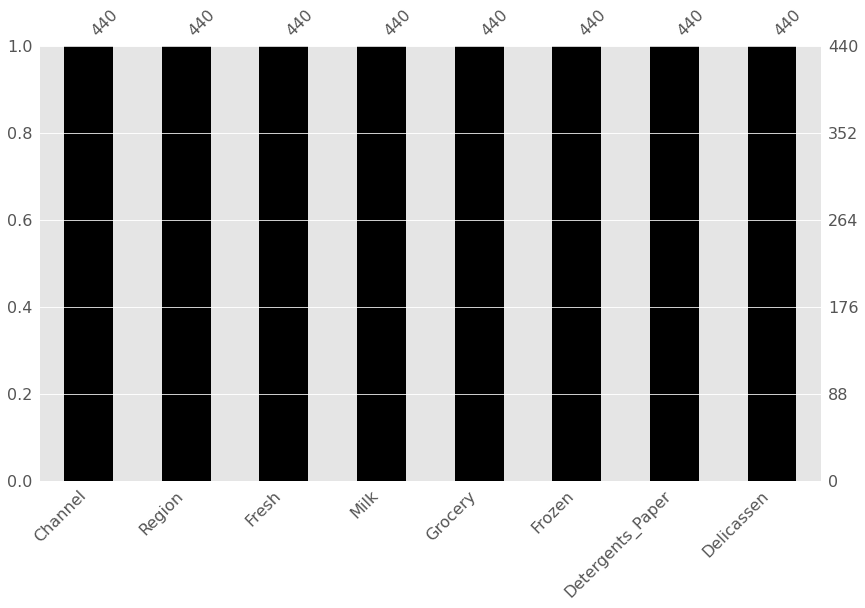

In [9]:
msno.bar(df=df, figsize=(14,8), color='k')

# Statictical Summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Since data does not contain missing values the type of features can be easily arranged in adequat dtype

In [15]:
df = df.assign(
    Channel = df.Channel.astype(np.int8),
    Region = df.Region.astype(np.int8),
    Fresh = df.Fresh.astype(np.int32),
    Milk = df.Milk.astype(np.int32),
    Grocery = df.Grocery.astype(np.int32),
    Frozen = df.Frozen.astype(np.int32),
    Detergents_Paper = df.Detergents_Paper.astype(np.int32),
    Delicassen = df.Delicassen.astype(np.int32),
)

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int8 
 1   Region            440 non-null    int8 
 2   Fresh             440 non-null    int32
 3   Milk              440 non-null    int32
 4   Grocery           440 non-null    int32
 5   Frozen            440 non-null    int32
 6   Detergents_Paper  440 non-null    int32
 7   Delicassen        440 non-null    int32
dtypes: int32(6), int8(2)
memory usage: 11.3 KB


We can easily ditemine that Channel and region both of them are categorical features

# Data Cleaning

- Check for duplicates

In [16]:
df.duplicated().any()

False

There are no duplicates

# Visualization

- Distribution

In [18]:
df.median()

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

- histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feabb8594d0>,
      dtype=object)

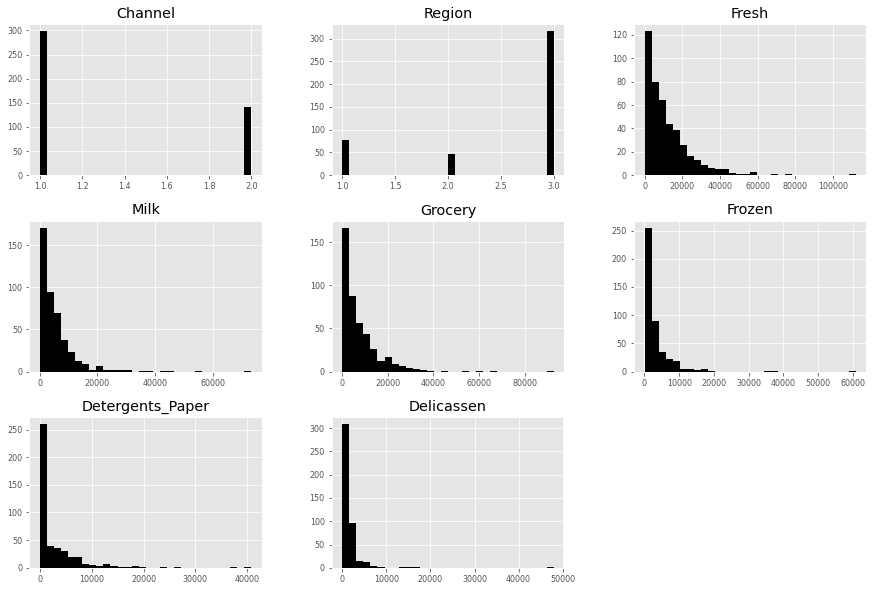

In [19]:
df.hist(figsize=(15, 10), bins=30, xlabelsize=8, ylabelsize=8, color='k')

The countinous featrues are right skiwed and contains outliers

- Correlation analysis

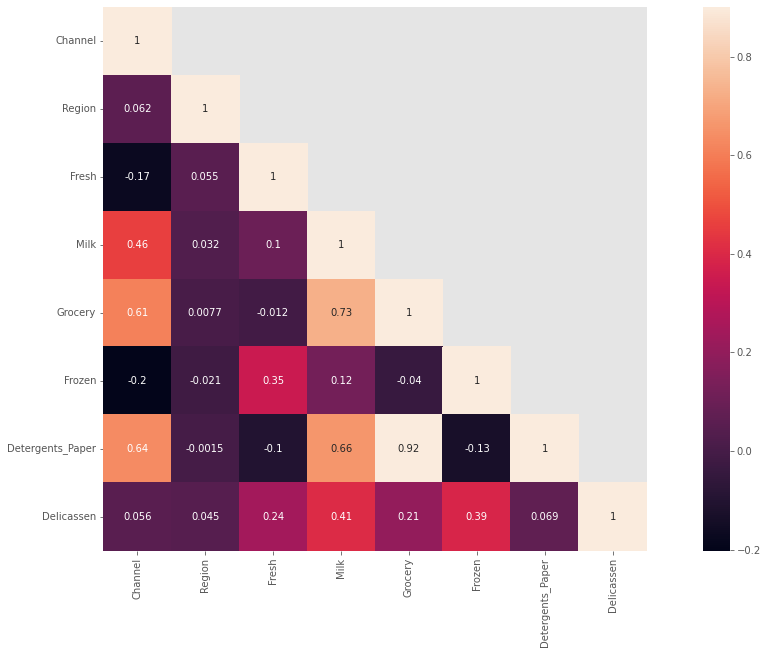

In [20]:
corr_mat = df.corr()

mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(corr_mat, mask=mask,vmax=.9, square=True,annot=True)

It can be seen that Detergents_Paper and grocery featrure are highly positive correlated between them. Also Grocery and Milk are moderately correlated.